In [139]:
#import libraries

from __future__ import division
%pylab inline
import re
import math
import string
from collections import Counter
import nltk


Populating the interactive namespace from numpy and matplotlib


C:\Users\004567\Anaconda3\envs\root3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1.Import corpus


In [122]:
TEXT = open('allbook.txt',encoding='utf-8').read()
len(TEXT)

11098116

In [123]:
TEXT[1000:1250]

'n orta\nümumitəhsil məktəblərinin biologiya müəllimləri də faydalana bilər.\nKitabın bütövlükdə və hisələrinin üzünün çıxarılması\nqadağandır.\n3\nÖN SÖZ\nAzərbaycan dilində embriologiya haqqında məlumatlar\n1976-cı ildə Abdullayev M.S., Abiyev H.S. “Ümumi\n'

In [124]:
def tokens(text):
    #add Azerbaijani alphabet
    return re.findall('[ABCÇDEƏFGĞHXIİJKQLMNOÖPRSŞTUÜVYZabcçdeəfgğhxıijkqlmnoöprsştuüvyz]+', text.lower()) 

In [125]:
#tokenize corpus
WORDS = tokens(TEXT)
len(WORDS)

1478667

In [126]:
WORDS = [i for i in WORDS if len(i)>1]

WORDS[50:100]

['və',
 'genetika',
 'kafedrasının',
 'baş',
 'müəllimi',
 'əsgərov',
 'lənkaran',
 'dövlət',
 'universiteti',
 'dosent',
 'şahbazov',
 'lənkaran',
 'dövlət',
 'universiteti',
 'dosent',
 'əvəzi',
 'ağayeva',
 'elmi',
 'redaktor',
 'biol',
 'şəmmədov',
 'hüseynov',
 'quliyev',
 'embriologiya',
 'dərs',
 'vəsaiti',
 'bakı',
 'səh',
 'birinci',
 'nəşr',
 'dərs',
 'vəsaitindən',
 'universitetlərin',
 'biologiya',
 'fakültəsində',
 'bakalavr',
 'dərəcəsi',
 'üzrə',
 'təhsil',
 'alan',
 'tələbələr',
 'tibb',
 'universiteti',
 'tibb',
 'kolleci',
 'tələbələri',
 'embriologiya',
 'sahəsində',
 'tədqiqat',
 'aparan']

# 2. Models: Bag of Words


In [127]:
def sample(bag, n=10):
    return ' '.join(random.choice(bag) for _ in range(n))

In [129]:
sample(WORDS)

'insanla vacib keçid belə göstərilməsi şərqi amili görünüşün və ay'

In [130]:
#create dictionary 
COUNTS = Counter(WORDS)

print(COUNTS.most_common(10))

[('və', 31140), ('bir', 21109), ('bu', 16103), ('də', 14191), ('ki', 12363), ('ilə', 10145), ('da', 9110), ('üçün', 7021), ('isə', 6086), ('idi', 6014)]


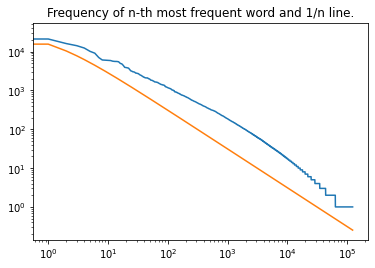

In [131]:
M = COUNTS['və']
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
plot([c for (w, c) in COUNTS.most_common()])
plot([M/i for i in range(1, len(COUNTS)+1)]);

# 3. Task: Spelling Correction

        


In [135]:
def correct(word):
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=COUNTS.get)

In [134]:
def known(words):
    return {w for w in words if w in COUNTS}

def edits0(word): 
    return {word}

def edits2(word):
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [133]:
def edits1(word):
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'ABCÇDEƏFGĞHXIİJKQLMNOÖPRSŞTUÜVYZabcçdeəfgğhxıijkqlmnoöprsştuüvyz'

In [136]:
splits('necesen')

[('', 'necesen'),
 ('n', 'ecesen'),
 ('ne', 'cesen'),
 ('nec', 'esen'),
 ('nece', 'sen'),
 ('neces', 'en'),
 ('necese', 'n'),
 ('necesen', '')]

In [64]:
print(edits1('necesen'))

{'neİcesen', 'necesenr', 'cecesen', 'necesIn', 'Gecesen', 'necZsen', 'neFcesen', 'nevcesen', 'necDsen', 'nemcesen', 'necOesen', 'neceFen', 'necesenƏ', 'nZcesen', 'necegsen', 'nIcesen', 'necGsen', 'necesçn', 'necelen', 'Unecesen', 'neceseh', 'Üecesen', 'nüecesen', 'necesQen', 'enecesen', 'necewen', 'nŞecesen', 'neceesn', 'necvsen', 'necbesen', 'npcesen', 'necesezn', 'necewsen', 'neceseYn', 'necTesen', 'necesenÖ', 'nAcesen', 'necesehn', 'lnecesen', 'neceOsen', 'neceseb', 'necesenI', 'nEecesen', 'nJecesen', 'necesZen', 'necjesen', 'nicesen', 'nxcesen', 'nVecesen', 'neycesen', 'necesenQ', 'necesenN', 'neceseL', 'necezsen', 'necYsen', 'neceŞen', 'npecesen', 'nccesen', 'necsen', 'nycesen', 'neGcesen', 'necesej', 'bnecesen', 'necesenv', 'neceusen', 'necFesen', 'nevesen', 'neceöen', 'neceseC', 'neResen', 'eecesen', 'nPcesen', 'neƏcesen', 'neceen', 'necYesen', 'neMesen', 'neceCsen', 'neceIen', 'negesen', 'neceDen', 'necZesen', 'necnesen', 'necesePn', 'neceAsen', 'neceTen', 'necesden', 'neQcesen

In [65]:
print(len(edits2('sagolun')))

444194


In [67]:

def case_of(text):
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)
map(case_of, ['UPPER', 'lower', 'Title', 'CamelCase'])

In [137]:
def correct_text(text):
    return re.sub('[ABCÇDEƏFGĞHXIİJKQLMNOÖPRSŞTUÜVYZabcçdeəfgğhxıijkqlmnoöprsştuüvyz]+', correct_match, text)

def correct_match(match):
    word = match.group()

    result = case_of(word)(correct(word.lower()))
    return case_of(word)(correct(word.lower()))


In [69]:
correct_text('salam hekim menim sag boyrek ağryyir')

'salam həkim mənim sağ böyrək ağrıyır'

In [72]:
correct_text('necesen qardaw')

'necəsən qardaş'

In [108]:
correct_text('merto hacan bow olur? son zamanlr birax vxt axz olur ')

'metro haçan boş olur? son zamanlar biraz vaxt az olur '

# 4. Building bigrams

In [296]:
with open("allbook.txt", "r", encoding='utf-8') as book:
    lines = book.readlines()

In [297]:
def clean_list(element):
    regex = re.compile('[^ABCÇDEƏFGĞHXIİJKQLMNOÖPRSŞTUÜVYZabcçdeəfgğhxıijkqlmnoöprsştuüvyz+]')
    temp = regex.sub(' ', element.lower())
    return " ".join(temp.split())

In [298]:
def delete_element(element):
    return ' '.join([i for i in element.split() if len(i)>1])

In [299]:
output_list = list(map(clean_list, lines))
output_list = list(map(delete_element, output_list))
output_list = [i for i in output_list if len(i)>1]

In [300]:
random.choice(output_list,10)


array(['mehmanxana onların hər birində orta hesabla yer var',
       'kondensasiyası ilə əlaqədar olaraq nüvə membranının onlarla əlaqəsi',
       'var imiş da nə bilim gündə orda burda qızlarla kefə',
       'istəsə də bacarmırdı sanki bütün xəyal arzu və istəkləri bir andaca',
       'azərbaycanlını cəzalandıracağını söylədi ancaq xəfiyyə',
       'mədəniyyət abidələrinin qorunub mühafizə olunmasını daha',
       'adqeziya', 'cinsiyyəti idarə edən xüsusi genlər də mövcuddur',
       'və yenidən düşünməyi tələb etmişdi amma heç bir faydası yox idi',
       'hər nə qədər ümidsizliyə qapılmamaq üçün özümü'], dtype='<U451')

In [301]:
bigrams = [b for l in output_list for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]

In [302]:
bigrams[150:165]

[('rus', 'və'),
 ('digər', 'dillərdən'),
 ('dillərdən', 'rus'),
 ('rus', 'dilinə'),
 ('dilinə', 'tərcümə'),
 ('tərcümə', 'olunmuş'),
 ('olunmuş', 'ədəbiyyatlardan'),
 ('ədəbiyyatlardan', 'istifadə'),
 ('istifadə', 'olunub'),
 ('olunub', 'ngilis'),
 ('ngilis', 'dilində'),
 ('dilində', 'çap'),
 ('çap', 'olunmuş'),
 ('olunmuş', 'ən'),
 ('ən', 'son')]

In [303]:
f = open('bigram_all_books.txt', 'w',encoding='utf-8')

for t in bigrams:
  f.write(' '.join(str(s) for s in t) + '\n')